<a href="https://colab.research.google.com/github/amrendra1002/DS-ML/blob/master/DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.layers.normalization import BatchNormalization
#from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from matplotlib import pyplot
import os

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
os.chdir(r'/content/drive/My Drive/Data/archive (1).zip (Unzipped Files)/chest_xray')

In [5]:
!ls

test  train  val


In [6]:
normal_images = []
for image in tqdm(os.listdir("train/NORMAL")):
    if image is not None:
        normal_images.append(image)


100%|██████████| 1334/1334 [00:00<00:00, 403257.77it/s]


In [7]:
pnem_images = []
for image in tqdm(os.listdir("train/PNEUMONIA")):
    if image is not None:
        pnem_images.append(image)

100%|██████████| 3872/3872 [00:00<00:00, 1581030.48it/s]


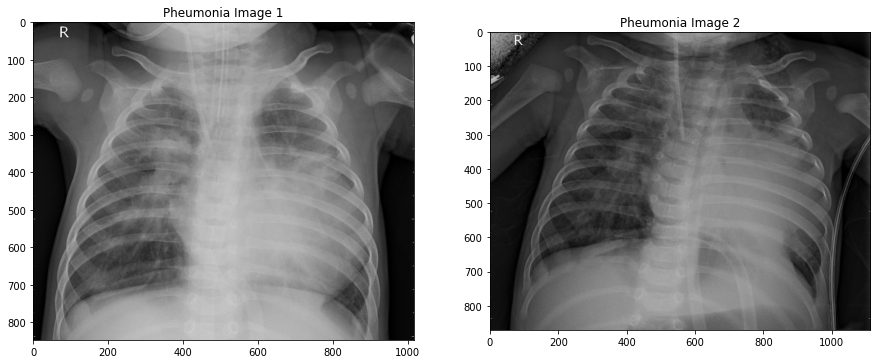

In [8]:
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))
for i in range(2):
    pnem_img = load_img("train/PNEUMONIA" + "/" + pnem_images[i])
    ax[i].imshow(pnem_img)
    ax[i].set_title('Pheumonia Image ' + str(i+1))

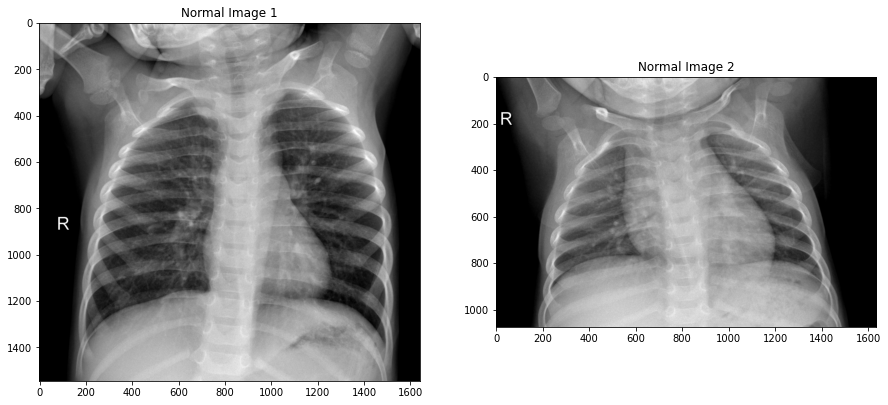

In [9]:
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))
for i in range(2):
    normal_img = load_img("train/NORMAL" + "/" + normal_images[i])
    ax[i].imshow(normal_img)
    ax[i].set_title('Normal Image ' + str(i+1))

Text(0.5, 1.0, 'Width Shifted Pheumonia Image')

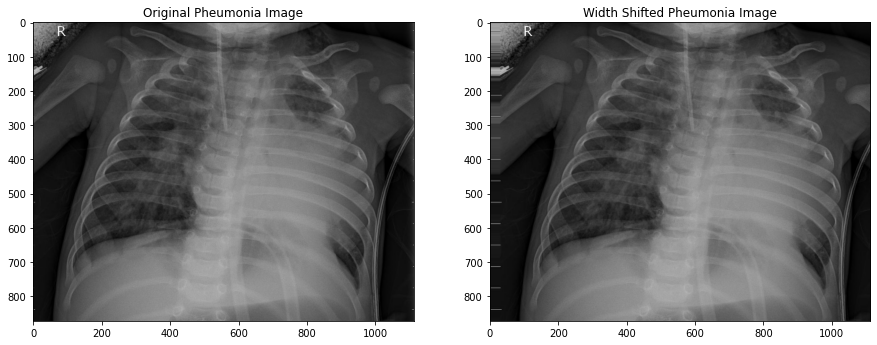

In [10]:
#Increase rank of image from 3 to 4
pnem_img1 = np.expand_dims(pnem_img, 0)
# ImageDataGenerator shifting
datagen = ImageDataGenerator(width_shift_range=0.3)

# iterator
aug_iter = datagen.flow(pnem_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

# generate batch of images

# convert to unsigned integers
image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(pnem_img)
ax[0].set_title('Original Pheumonia Image')
ax[1].imshow(image)
ax[1].set_title('Width Shifted Pheumonia Image')


Text(0.5, 1.0, 'Horizontal Flip Pheumonia Image')

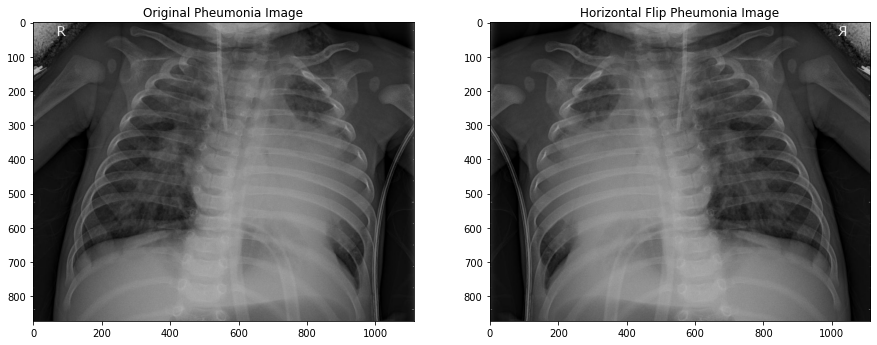

In [11]:
# ImageDataGenerator shifting
datagen = ImageDataGenerator(horizontal_flip=True)

# iterator
aug_iter = datagen.flow(pnem_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

# convert to unsigned integers
image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(pnem_img)
ax[0].set_title('Original Pheumonia Image')
ax[1].imshow(image)
ax[1].set_title('Horizontal Flip Pheumonia Image')

Text(0.5, 1.0, 'Width Shift Normal Image')

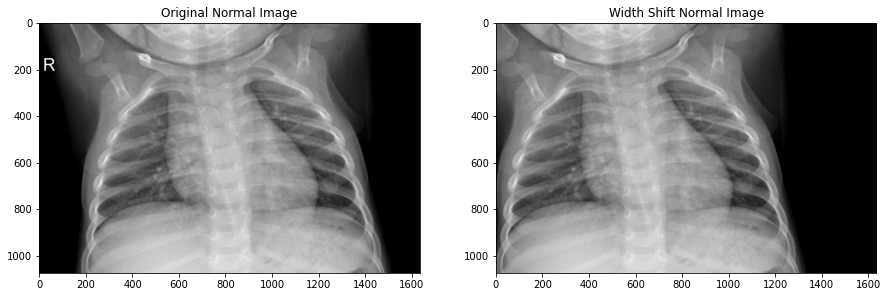

In [12]:
#Increase rank of image from 3 to 4
normal_img1 = np.expand_dims(normal_img, 0)
# ImageDataGenerator shifting
datagen = ImageDataGenerator(width_shift_range=0.2)

# iterator
aug_iter = datagen.flow(normal_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(normal_img)
ax[0].set_title('Original Normal Image')
ax[1].imshow(image)
ax[1].set_title('Width Shift Normal Image')

Text(0.5, 1.0, 'Horizontal Flip Normal Image')

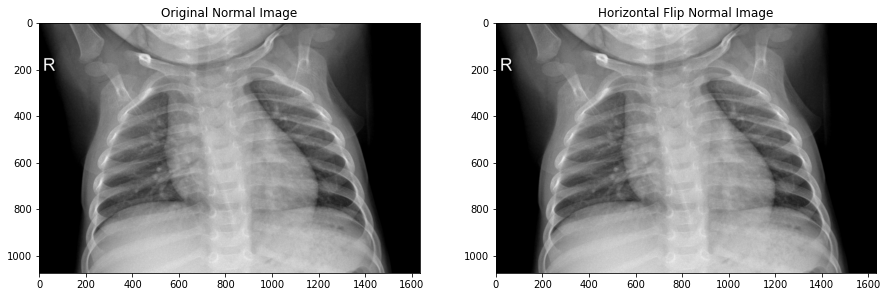

In [13]:
# ImageDataGenerator shifting
datagen = ImageDataGenerator(horizontal_flip=True)

# iterator
aug_iter = datagen.flow(normal_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

# convert to unsigned integers
image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(normal_img)
ax[0].set_title('Original Normal Image')
ax[1].imshow(image)
ax[1].set_title('Horizontal Flip Normal Image')

In [57]:
train_pneum_image = []
i = 0
for image1 in tqdm(os.listdir("train/PNEUMONIA")):
    img = load_img("train/PNEUMONIA" + "/" + image1, target_size=(28,28,1), color_mode="grayscale")
    img = np.array(img)
    img = img/255
    train_pneum_image.append(img)
    #i = i+ 1
    #if i == 100:
    #  break

100%|██████████| 3872/3872 [00:26<00:00, 146.93it/s]


In [58]:
X_pnem = np.array(train_pneum_image)

In [59]:
X_pnem.shape

(3872, 28, 28)

In [60]:
Y_pnem = np.ones(X_pnem.shape[0])

In [61]:
Y_pnem.shape

(3872,)

In [62]:
train_normal_image = []
i = 0
train_image = train_pneum_image.copy()
for image1 in tqdm(os.listdir("train/NORMAL")):
    img = load_img("train/NORMAL" + "/" + image1, target_size=(28,28,1), color_mode="grayscale")
    img = np.array(img)
    img = img/255
    train_normal_image.append(img)
    train_image.append(img)
    #i = i+ 1
    #if i == 100:
    #  break

100%|██████████| 1334/1334 [00:28<00:00, 47.33it/s]


In [63]:
X = np.array(train_image)
X.shape

(5206, 28, 28)

In [64]:
X_normal = np.array(train_normal_image)

In [65]:
Y_normal = np.zeros(X_normal.shape[0])

In [66]:
Y = np.concatenate([Y_pnem, Y_normal], axis=0)

In [67]:
Y.shape

(5206,)

In [68]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X, Y, random_state=0)

In [69]:
X_train.shape, Y_train.shape

((5206, 28, 28), (5206,))

In [70]:
test_pneum_image = []
i = 0
for image1 in tqdm(os.listdir("test/PNEUMONIA")):
    img = load_img("test/PNEUMONIA" + "/" + image1, target_size=(28,28,1), color_mode="grayscale")
    img = np.array(img)
    img = img/255
    test_pneum_image.append(img)
   # i = i+ 1
   # if i == 50:
   #   break

100%|██████████| 390/390 [00:02<00:00, 168.26it/s]


In [28]:
test_normal_image = []
i = 0
test_image = test_pneum_image.copy()
for image1 in tqdm(os.listdir("test/NORMAL")):
    img = load_img("test/NORMAL" + "/" + image1, target_size=(28,28,1), color_mode="grayscale")
    img = np.array(img)
    img = img/255
    test_normal_image.append(img)
    test_image.append(img)
#    i = i+ 1
#    if i == 50:
#      break

100%|██████████| 234/234 [00:03<00:00, 69.36it/s]


In [29]:
X_pnem = np.array(test_pneum_image)

In [30]:
X_pnem.shape

(390, 28, 28)

In [31]:
Y_pnem = np.ones(X_pnem.shape[0])
Y_pnem.shape

(390,)

In [48]:
X = np.array(test_image)
X.shape

(624, 28, 28)

In [33]:
X_normal = np.array(test_normal_image)

In [34]:
Y_normal = np.zeros(X_normal.shape[0])

In [35]:
Y = np.concatenate([Y_pnem, Y_normal], axis=0)

In [36]:
from sklearn.utils import shuffle
X_test, Y_test = shuffle(X, Y, random_state=0)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)

In [72]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((4164, 28, 28), (4164,), (1042, 28, 28), (1042,))

In [73]:
x_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]).astype('float32')
x_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]).astype('float32')

In [74]:
x_train.shape, x_test.shape

((4164, 784), (1042, 784))

In [75]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
#model.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(1,activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 551,809
Trainable params: 551,809
Non-trainable params: 0
________________________________________________

In [77]:
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

In [78]:
model.fit(x_train,Y_train,epochs=100,verbose=1, batch_size=10, validation_data=(x_test,Y_test))

Epoch 1/100
417/417 [==============================] - 3s 5ms/step - loss: 1.4380 - accuracy: 0.7837 - val_loss: 0.2542 - val_accuracy: 0.9117
Epoch 2/100
417/417 [==============================] - 2s 5ms/step - loss: 0.2639 - accuracy: 0.9127 - val_loss: 0.2048 - val_accuracy: 0.9223
Epoch 3/100
417/417 [==============================] - 2s 5ms/step - loss: 0.2071 - accuracy: 0.9261 - val_loss: 0.2324 - val_accuracy: 0.9155
Epoch 4/100
417/417 [==============================] - 2s 5ms/step - loss: 0.1919 - accuracy: 0.9302 - val_loss: 0.2065 - val_accuracy: 0.9155
Epoch 5/100
417/417 [==============================] - 2s 5ms/step - loss: 0.1923 - accuracy: 0.9333 - val_loss: 0.1261 - val_accuracy: 0.9559
Epoch 6/100
417/417 [==============================] - 2s 5ms/step - loss: 0.1715 - accuracy: 0.9339 - val_loss: 0.1792 - val_accuracy: 0.9242
Epoch 7/100
417/417 [==============================] - 2s 4ms/step - loss: 0.1599 - accuracy: 0.9377 - val_loss: 0.1297 - val_accuracy: 0.9463

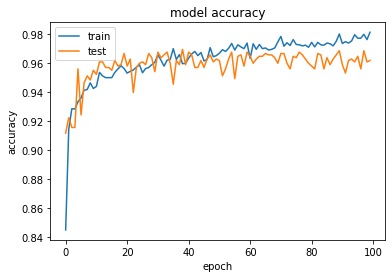

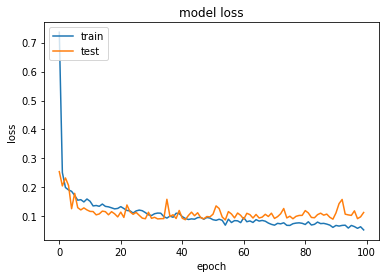

In [79]:
history = model.history
# list all data in history
#print(history.history.keys())
# summarize history for accuracy
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()
# summarize history for loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

In [80]:
X_test.shape

(1042, 28, 28)

In [81]:
Y_test.shape

(1042,)

In [82]:
Y_test

array([1., 1., 1., ..., 1., 0., 1.])

In [85]:
Y_test_pred = model.predict_classes(X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]).astype('float32'))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [87]:
confusion_matrix(Y_test, Y_test_pred)

array([[263,   3],
       [ 37, 739]])

In [89]:
accuracy_score(Y_test, Y_test_pred)

0.9616122840690979